In [1]:
import os
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go 
import plotly.tools as pt

In [2]:
username = 'yonghuili'
api_key = '8Yhcnt2O9LuDUX2dvQYz'
pt.set_credentials_file(username=username, api_key=api_key)

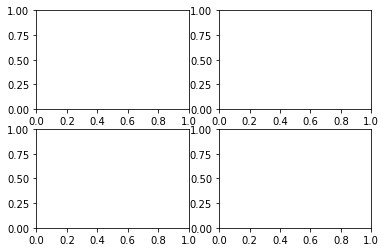

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

n_bins = 10
x = np.random.randn(1000, 3)
colors = ['red', 'tan', 'lime']
ax1.hist(x, n_bins, density=True, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

# ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
# ax2.set_title('stack step (unfilled)')

# # Make a multiple-histogram of data-sets with different length.
# x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
# ax3.hist(x_multi, n_bins, histtype='bar')
# ax3.set_title('different sample sizes')

# fig.tight_layout()
plt.show()

In [3]:
df = pd.read_csv(os.path.join('data','state_usage.csv'))
names = ['December 2008 YTD', 'December 2009 YTD', 'December 2010 YTD', 'December 2011 YTD', 'December 2012 YTD',
         'December 2013 YTD', 'December 2014 YTD', 'December 2015 YTD', 'December 2016 YTD','December 2017 YTD']
df = df[['state']+names]
df = df.drop([22]).reset_index(drop=True)
# df
years = []
for i in range(2008, 2018):
    years.append(str(i))
# years
# len(years)

In [4]:
def get_state(df, i):
#     print(i)
    state_name = df.iloc[i].tolist()[0]
    val = df.iloc[i].tolist()[1:]
    return state_name, val
def get_visible(total, idx):
    l = [False]*(total+1)
    l[idx] = True
    l[-1] = True
    return l
def gg_visible(total, idx):
    l = [False]*(total+1)
    l[idx+1] = True
    l[0] = True
    return l
def get_all_visible(total):
#     l = [False]*(total+1)
#     l[0] = True
#     return l
    return [True]*(total+1)

In [5]:
def generate_data(df, total, years, colors):
    data = []
    for i in range(total):
        state, val = get_state(df, i)
        tmp = go.Scatter(x=years,
                            y=val,
                            name=state,
                            visible=False,
                            line=dict(color=colors[i]))
        data.append(tmp)
    data[0].visible = True
    return data

def get_buttons(df, total):
    buttons = []
    for i in range(total):
        state, val = get_state(df, i)
        visible_list = get_visible(total, i)
        b = dict(label = state,
                 method = 'update',
                 args = [{'visible': visible_list},
                         {'title': state,
                          'annotations': []}
                        ]
                )
        buttons.append(b)
    buttons.append(
        dict(label = 'ALL',
            method = 'update',
            args = [{'visible': get_all_visible(total)},
                    {'title': 'ALL', 'annotations': []}])
    )
    return buttons

def gg_data(df, total, years, colors):
    data = []
    for i in range(total):
        state, val = get_state(df, i)
        tmp = go.Scatter(x=years,
                            y=val,
                            name=state,
                            visible=True,
                            line=dict(color=colors[i]))
        data.append(tmp)
    return data

def gg_buttons(df, total):
    buttons = []
    buttons.append(
        dict(label = 'ALL',
            method = 'update',
            args = [{'visible': get_all_visible(total)},
                    {'title': 'ALL', 'annotations': []}])
    )
    for i in range(total):
        state, val = get_state(df, i)
        visible_list = gg_visible(total, i)
        b = dict(label = state,
                 method = 'update',
                 args = [{'visible': visible_list},
                         {'title': state,
                          'annotations': []}
                        ]
                )
        buttons.append(b)
    return buttons

def get_layout(data, buttons):
    menus = list([
        dict(type="buttons",
         active=-1,
         buttons=buttons
    )])
    layout = dict(title='Electricity', showlegend=False, updatemenus=menus)
    return layout

In [6]:
total = 15
color50 = ['#0cb8f5', '#c785af', '#39dd2b', '#817328', '#e65e1c', '#5144b4', '#d4fb07',
                    '#048254', '#53069a', '#f3c0dc', '#2c41fa', '#b438a3', '#265f2b', '#7d48a3',
                    '#2795c1', '#164213', '#755ac5', '#5ade9b', '#4c0053', '#dd33f8', '#edb312',
                    '#743637', '#359e6e', '#110245', '#1f7937', '#c24e95', '#a8e2cb', '#e5ee71',
                    '#418445', '#fd8c95', '#f88775', '#a61401', '#fd78c3', '#008889', '#81072e',
                    '#08c45e', '#67e7c7', '#c24142', '#4440ab', '#3fedc5', '#bfefd6', '#394877',
                    '#93b6ad', '#40898b', '#782f1e', '#ce6122', '#52364d', '#c47762', '#63ed69',
                    '#5e753f']
colors = ['#3333cc']*total
data = generate_data(df, total, years, color50)
buttons = get_buttons(df, total)
layout = get_layout(data, buttons)

# dd = gg_data(df, total, years, colors)
# bb = gg_buttons(df, total)
# layout = get_layout(dd, bb)

In [7]:
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='usa')